In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, plot_confusion_matrix
from sklearn import svm

In questa lezione, vedremo come usare un algoritmo di classificazione a partire da un dataset generato automaticamente.

## Generazione dei dati

Scikit Learn ci offre una serie di tool per generare automaticamente dei dati, onde familiarizzare con la libreria e con gli altri strumenti a nostra disposizione. In particolare, usiamo il metodo [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) del package `sklearn.datasets`.

In [4]:
X, y = make_classification(n_samples=1000, n_informative=5, n_classes=5)

## Definizione di set di training e di test

A questo punto, possiamo usare il metodo `train_test_split` per suddividere i dati in due parti, ovvero un *training set* ed un *test set*. Di default, questo metodo suddivide i dati in un 70% di training ed un 30% di test; lasciamo questa suddivisione.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Possiamo adesso creare il nostro primo classificatore, che sarà basato su un albero decisionale, e provare ad addestrarlo sui dati a nostra disposizione. In tal senso, dovremo chiamare il metodo `fit()`, passando ovviamente i dati appartenenti al set di training.

In [6]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

Una volta completato l'addestramento, potremo usare il metodo `predict()` sui dati di test, che ci permette di ottenere i valori predetti per ciascuna classe.

In [8]:
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(recall_score(y_pred, y_test))
print(precision_score(y_pred, y_test))

0.484


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

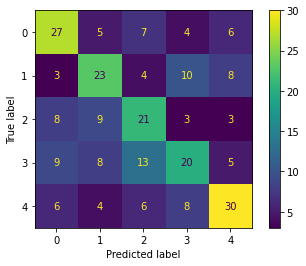

In [6]:
plot_confusion_matrix(dt_clf, X_test, y_test)

Per prima cosa, importiamo il metodo `load_iris`, che ci permette di caricare all'interno del programma un *dataset* (chiamato per l'appunto IRIS) che useremo a scopi di classificazione.

Il secondo punto interessante è l'uso del metodo `train_test_split`, che ci permette di suddividere il dataset in due parti: una prima, chiamata di norma *insieme dei dati di training*, relativa ai dati che saranno usati per addestrare il modello, ed una seconda, chiamata *insieme dei dati di test*, che sarà usata per *validare* il modello.

A quel punto, creeremo un oggetto di tipo `DecisionTreeClassifier()`, che per l'appunto ci permetterà di usare un albero decisionale a scopo di classificazione. Questo oggetto sarà addestrato sul nostro insieme di training mediante il metodo `fit`, e potrà essere poi usato per effettuare una predizione sui dati di test mediante il metodo `predict`.

In ultimo, vogliamo poter plottare l'albero risultante dalla nostra analisi; per farlo, useremo il metodo `plot_tree`.

In [2]:
#plot_tree(clf)
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [3]:
y_pred = clf.predict(X_test)

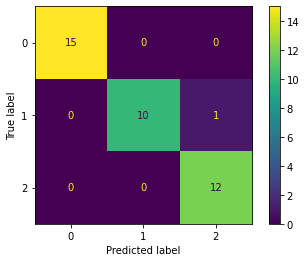

In [4]:
plot_confusion_matrix(clf, X_test, y_test)